# Geo-cordinates for the data 

In [1]:
with open('map_locations.txt','r') as f:
    file = f.read()
print(len(file))

112203


In [2]:
file[:1000]

'{\n"type": "FeatureCollection",\n"name": "home_map_points_april2022",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n"features": [\n{ "type": "Feature", "properties": { "field_1": 0, "Cities": "Ad Dammam", "Ref": "<a href=\\"https:\\/\\/transitcosts.com\\/projects\\/addammam-dammam-metro-a-sharqiya\\" target=\\"_tab\\">Dammam Metro (a-Sharqiya)<\\/a>", "lat": 26.4282, "lng": 50.0997, "Link": "<a href=\\"https:\\/\\/transitcosts.com\\/cities\\/Ad-Dammam\\/\\"target=\\"_tab\\">Ad Dammam<\\/a>" }, "geometry": { "type": "Point", "coordinates": [ 50.0997, 26.4282 ] } },\n{ "type": "Feature", "properties": { "field_1": 1, "Cities": "Adana", "Ref": "<a href=\\"https:\\/\\/transitcosts.com\\/projects\\/adana-first-stage\\" target=\\"_tab\\">First stage<\\/a>", "lat": 36.995, "lng": 35.32, "Link": "<a href=\\"https:\\/\\/transitcosts.com\\/cities\\/Adana\\/\\"target=\\"_tab\\">Adana<\\/a>" }, "geometry": { "type": "Point", "coordinates": [ 35.32, 36.995

In [3]:
import pandas as pd
import json

# Load the GeoJSON data
data = json.loads(file)


In [4]:
data['features'][1]

{'type': 'Feature',
 'properties': {'field_1': 1,
  'Cities': 'Adana',
  'Ref': '<a href="https://transitcosts.com/projects/adana-first-stage" target="_tab">First stage</a>',
  'lat': 36.995,
  'lng': 35.32,
  'Link': '<a href="https://transitcosts.com/cities/Adana/"target="_tab">Adana</a>'},
 'geometry': {'type': 'Point', 'coordinates': [35.32, 36.995]}}

In [5]:
import pandas as pd
import json

# Load the GeoJSON data
data = json.loads(file)


# Initialize empty lists to store data
cities = []
lat = []
lon = []

# Loop through the features and extract data
for feature in data['features']:
    properties = feature['properties']
    cities.append(properties['Cities'])
    lat.append(properties['lat'])
    lon.append(properties['lng'])
# Create a DataFrame
df = pd.DataFrame({
    'City': cities,
    'Lat': lat,
    'Lon': lon,
})


In [6]:
df

,City,Lat,Lon
0,Ad Dammam,26.428200,50.099700
1,Adana,36.995000,35.320000
2,Ahmadabad,23.030100,72.580000
3,Amsterdam,52.350000,4.916600
4,Ankara,39.927200,32.864400
...,...,...,...
148,Xi'an,34.275000,108.895000
149,Xiamen,24.450000,118.080000
150,Xuzhou,34.205769,117.284126
151,Zhengzhou,34.755000,113.665100


In [7]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Lon, df.Lat), crs="EPSG:4326"
)

<Axes: >

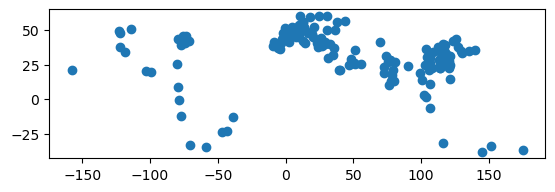

In [8]:
gdf.plot()

In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   City      153 non-null    object  
 1   Lat       152 non-null    float64 
 2   Lon       152 non-null    float64 
 3   geometry  153 non-null    geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 4.9+ KB


In [11]:
transit=pd.read_csv("Data/transit_income.csv")

In [12]:
transit_cities = pd.DataFrame(transit.groupby('city').size())
transit_cities.rename(columns={0:'Projects'}, inplace=True)
# transit_cities=transit_cities.reset_index()
transit_cities

,Projects
city,
Ad Dammam,1
Adana,1
Ahmadabad,1
Amsterdam,1
Ankara,1
...,...
Xuzhou,6
Zhengzhou,10
Zibo,1


In [13]:
gdf.rename(columns={'City':'city'}, inplace=True)
gdf.set_index('city', inplace=True)
gdf=gdf.join(transit_cities)
gdf=gdf.reset_index()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


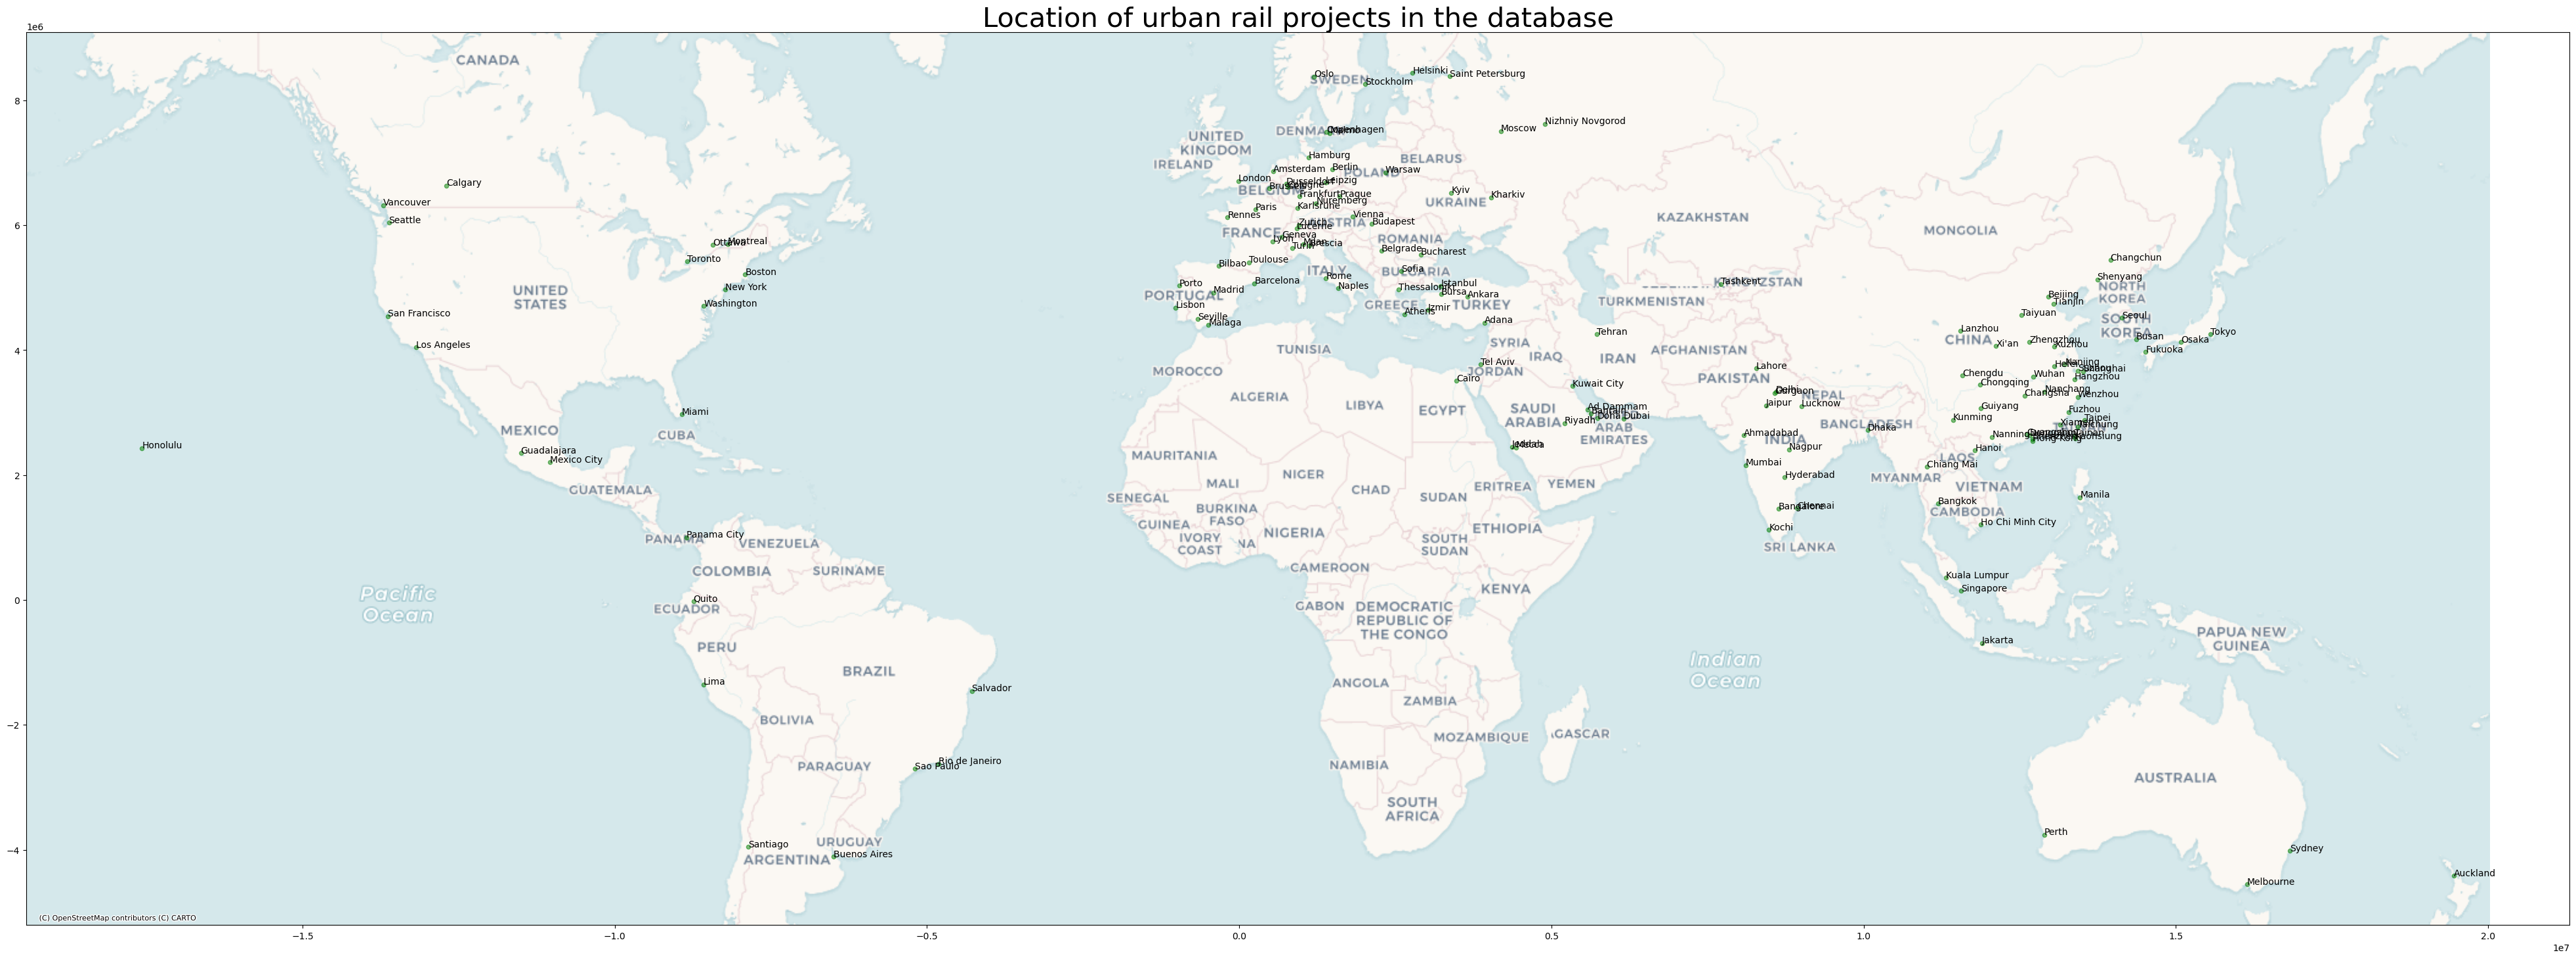

In [23]:
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd

gdf = gdf.to_crs('EPSG:3857')

fig, ax = plt.subplots(figsize=(50, 30))

gdf.plot(ax=ax, markersize=20, color='g', alpha=0.5)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['city']):
    ax.text(x, y, label, fontsize=10)

ax.set_title("Location of urban rail projects in the database", fontsize=30)

ctx.add_basemap(ax, crs='EPSG:3857', source=ctx.providers.CartoDB.Voyager)

# Save the plot as an image
plt.savefig('my_map.png', dpi=300)  # you can replace 'png' with 'pdf', 'svg', etc.


In [15]:
gdf.to_file("Data/city_locations.geojson", driver='GeoJSON')